# **Sistemas Inteligentes para a Bioinformática (grupo 4)**

**Trabalho elaborado por:**

Afonso Sá (pg54434)

Armindo Machado

Laís Carvalho (pg52536)

Sofia Ferreira (pg53502)

## **1) Exploração inicial e pré-processamento**

### **1.1) Descrição dos dados com base na literatura disponível**


As *Drug-target interactions (DTI)* são fundamentais para a descoberta de novos medicamentos e para a compreensão dos mecanismos de ação dos compostos químicos (Zitnik et al.,2019). Estas interações caracterizam-se pela ligação de compostos a alvos biológicos, como proteínas, determinando a sua eficácia e segurança no tratamento de diversas doenças (Santos et al.,2017).

Tradicionalmente, a identificação de DTI's dependia de métodos experimentais laboratoriais, e dispendiosos. Com os avanços computacionais, abordagens baseadas em *deep learning* têm revolucionado esta área, permitindo a análise de grandes volumes de dados moleculares e predições mais eficazes (Lee et al.,2019). Modelos de *deep learning* oferecem maior expressividade para processar padrões complexos em dados, como sequências de aminoácidos de proteínas e representações químicas de compostos (SMILES - simplified molecular-input line-entry system) (Huang et al.,2020).

**A aplicação de *deep learning* em DTI permite:**

- Predições quantitativas e qualitativas de afinidade de ligação.

- Descoberta de novos alvos terapêuticos e reposicionamento de medicamentos existentes;

- Análise eficiente de interações em escala, integrando múltiplos tipos de dados moleculares e biológicos;

Neste contexto, o dataset [DAVIS](https://tdcommons.ai/multi_pred_tasks/dti) é amplamente utilizado como um benchmark para desenvolver e validar modelos computacionais capazes de prever a afinidade de ligação entre inibidores de quinases e proteínas quinases humanas.

#### Descrição do Dataset

**Origem:** O dataset DAVIS, usado amplamente em predições DTI's, consiste  numa coleção de dados sobre a interação entre 72 inibidores de quinases e 442 quinases, representando mais de 80% dos domínios catalíticos conhecidos do kinoma humano (Davis et al., 2011).

**Tarefa Primária:**

Regressão: Prever a afinidade de ligação (binding affinity) entre compostos químicos e proteínas.

O objetivo é fornecer uma previsão quantitativa (geralmente em log-scale) da afinidade medida, como IC50 (concentração inibitória), Ki (constante de inibição) ou Kd (constante de dissociação).

**Informação do dataset:**
- Total de pares DTI (droga-alvo): 25.772.
- 72 compostos químicos (inibidores).
- 379 proteínas (quinases).


#### Estrutura e Representação dos Dados:

**Entrada:**

- SMILES: Representações químicas dos compostos;

- Sequências de Aminoácidos: Codificam as proteínas-alvo;


**Saída:**

Afinidades de ligação expressas em pIC50, pKi ou pKd, transformadas frequentemente para log-scale para maior estabilidade durante o treino.

**Divisões de Dados:**

- Random Split: Divisão aleatória dos dados em treino, validação e teste.

- Cold Drug Split: Exclusão de drogas no conjunto de treino para avaliar modelos em drogas novas.

- Cold Protein Split: Exclusão de proteínas no conjunto de treino para avaliar modelos em proteínas novas.



Compatível com bibliotecas de aprendizado profundo, como PyTorch e DGL.
Possibilidade de conversão para grafos, facilitando a aplicação de modelos baseados em redes neurais gráficas (GNN).



**References:**

 - Davis, M., Hunt, J., Herrgard, S. et al. Comprehensive analysis of kinase inhibitor selectivity. Nat Biotechnol 29, 1046–1051 (2011).

  - Santos, Rita, et al. "A comprehensive map of molecular drug targets." Nature reviews Drug discovery 16.1 (2017): 19-34.

  - Zitnik, Marinka, et al. "Machine learning for integrating data in biology and medicine: Principles, practice, and opportunities." Information Fusion 50 (2019): 71-91.

  - Lee, Ingoo, Jongsoo Keum, and Hojung Nam. "DeepConv-DTI: Prediction of drug-target interactions via deep learning with convolution on protein sequences." PLoS computational biology 15.6 (2019): e1007129.

  - Huang, Kexin, et al. "DeepPurpose: a deep learning library for drug–target interaction prediction." Bioinformatics 36.22-23 (2020): 5545-5547.

### **1.2) Carregamento do conjunto de dados e análise exploratória**

#### Carregamento do conjunto de dados

In [1]:
pip uninstall biothings_client mygene -y

In [2]:
pip install biothings_client==0.3.1

In [3]:
pip install mygene==3.2.2

In [4]:
pip install PyTDC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.3 MB/s eta 0:0

In [5]:
## Livrarias necessárias para esta secção
from tdc.multi_pred import DTI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
# Importar o conjunto de dados
## Passo indicado no repositório TDCommons
data = DTI(name='DAVIS')

Downloading...
100%|██████████| 21.4M/21.4M [00:02<00:00, 7.40MiB/s]
Loading...
Done!


In [7]:
## Obter os dados do dataset de trabalho (permite a manipulação como um dataframe)
df = data.get_data()
df

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,43.0
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,10000.0
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,10000.0
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,10000.0
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,10000.0
...,...,...,...,...,...
25767,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,10000.0
25768,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,10000.0
25769,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,1900.0
25770,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,4400.0


- **Drug_ID** - identificador numérico exclusivo para cada droga/composto;
- **Drug** - representação, em formato SMILES, da estrutura molecular da droga/composto;
- **Target_ID** - identificador exclusivo para cada alvo biológico;
- **Target** - Representação da sequência de aminoácidos do alvo biológico;
- **Y** - representa a força da interação droga-alvo.

#### Análise exploratória inicial

In [8]:
# Verificar se existem valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
Drug_ID      0
Drug         0
Target_ID    0
Target       0
Y            0
dtype: int64


In [9]:
print("Distribuição dos valores Y:")
print(df['Y'].describe())

Distribuição dos valores Y:
count    25772.000000
mean      7558.112997
std       3990.013578
min          0.016000
25%       3775.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: Y, dtype: float64


A variável Y é quantitativa e representa a interação. Precisamos observar a sua distribuição, para entender a escala e possíveis outliers:

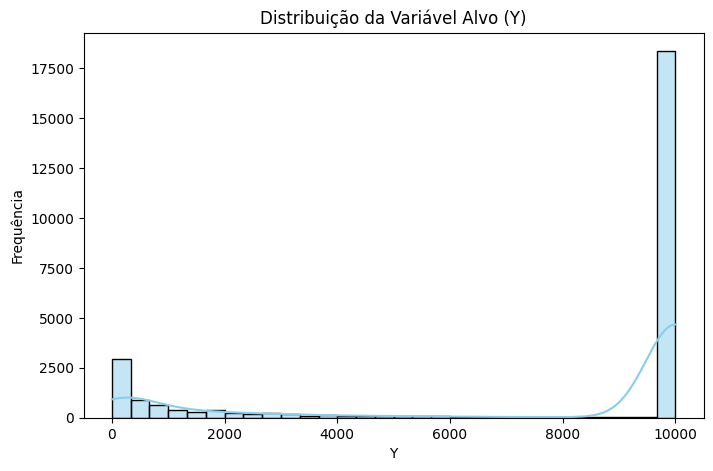

In [10]:
# Distribuição da variável Y
plt.figure(figsize=(8, 5))
sns.histplot(df['Y'], bins=30, kde=True, color='skyblue')
plt.title("Distribuição da Variável Alvo (Y)")
plt.xlabel("Y")
plt.ylabel("Frequência")
plt.show()

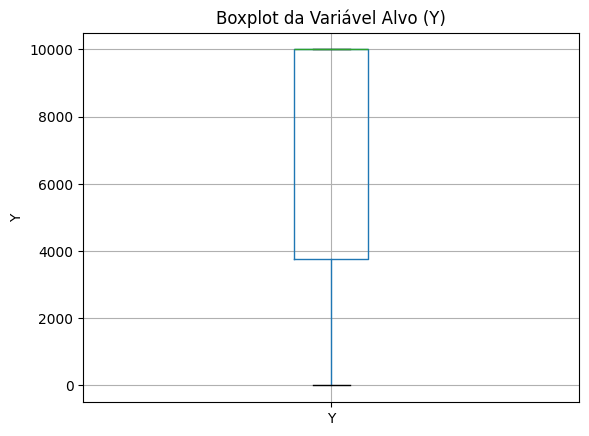

In [11]:
boxplot = df.boxplot(column=['Y'])
plt.title("Boxplot da Variável Alvo (Y)")
plt.ylabel("Y")
plt.show()

In [12]:
## Análise das estatísticas do dataset
data.print_stats()

--- Dataset Statistics ---
68 unique drugs.
379 unique targets.
25772 drug-target pairs.
--------------------------


No dataset em estudo, cada linha representa uma interação entre droga e alvo. Considerando que o total de pares possíveis é dado pela multiplicação do número de drogas (68) pelo número de alvos (379), pode-se concluir que todas as interações possíveis foram analisadas neste dataset.

In [13]:
## Confirmação que todas as interações possíveis foram testadas.
# 1. Verificar o número de interações (número de linhas no dataset)
num_interactions = len(df)
print(f'Número de interações: {num_interactions}')

# 2. Verificar o número de interações por droga
interactions_per_drug = df['Drug'].value_counts()
print(f'Número de interações por droga:\n{interactions_per_drug}')

# 3. Verificar se todas as drogas têm o mesmo número de interações
all_same_interactions = interactions_per_drug.nunique() == 1
if all_same_interactions:
    print('Todas as drogas têm o mesmo número de interações.')
else:
    print('As drogas têm números diferentes de interações.')

# 4. Verificar o total de interações possíveis
num_drugs = len(df['Drug'].unique())  # Número de drogas únicas
num_targets = len(df['Target'].unique())  # Número de alvos únicos
total_possible_interactions = num_drugs * num_targets
print(f'Número total de interações possíveis (drogas * alvos): {total_possible_interactions}')

Número de interações: 25772
Número de interações por droga:
Drug
Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12                                     379
CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc23)c1F                              379
N#CCC(C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1.O=P(O)(O)O                               379
CN(C)CC1CCn2cc(c3ccccc32)C2=C(C(=O)NC2=O)c2cn(c3ccccc23)CCO1                      379
COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)n2)cc(OC)c1OC.O=S(=O)(O)c1ccccc1    379
                                                                                 ... 
CN1CCN(C(=O)c2cc3cc(Cl)ccc3[nH]2)CC1                                              379
O=C(c1ccc(C=Cc2n[nH]c3ccccc23)cc1)N1CCNCC1                                        379
CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1              379
CC12OC(CC1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O                          379
Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1                                     

Há 68 fármacos únicos (os diferentes medicamentos representados na coluna Drug).

Cada fármaco tem interações com 379 alvos diferentes (sequências de aminoácidos representadas na coluna Target).

Existem 379 alvos únicos no conjunto de dados, e cada alvo está associado a 68 interações.

Como  'Drug' é uma representação SMILES, é útil verificar a distribuição do comprimento dessas strings, para ajudar a entender a complexidade das moléculas:

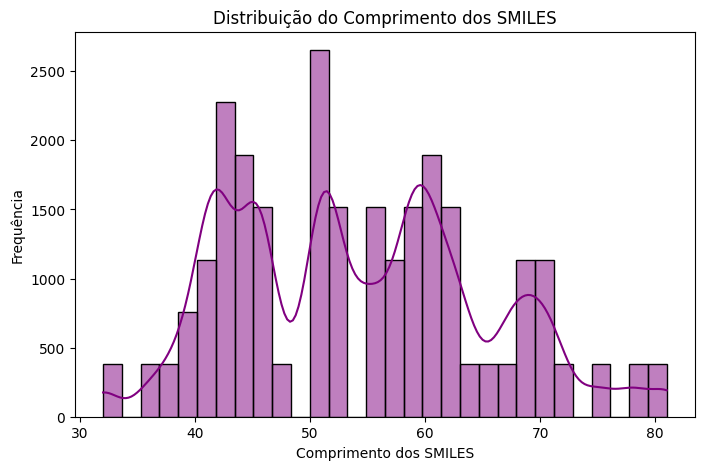


Estatísticas do Comprimento dos SMILES:
count    25772.000000
mean        54.176471
std         10.962637
min         32.000000
25%         45.000000
50%         53.000000
75%         61.250000
max         81.000000
Name: SMILES_Length, dtype: float64


In [14]:
# Calcular comprimento dos SMILES
df['SMILES_Length'] = df['Drug'].apply(len)

# Visualizar a distribuição dos comprimentos
plt.figure(figsize=(8, 5))
sns.histplot(df['SMILES_Length'], bins=30, kde=True, color='purple')
plt.title("Distribuição do Comprimento dos SMILES")
plt.xlabel("Comprimento dos SMILES")
plt.ylabel("Frequência")
plt.show()

# Estatísticas básicas
print("\nEstatísticas do Comprimento dos SMILES:")
print(df['SMILES_Length'].describe())


A análise sugere que o dataset contém moléculas de complexidades variadas, com dois grupos principais de moléculas diferenciados pelo comprimento de suas representações SMILES. A média de 54 caracteres com um desvio padrão moderado indica que os comprimentos estão razoavelmente distribuídos em torno dessa média.

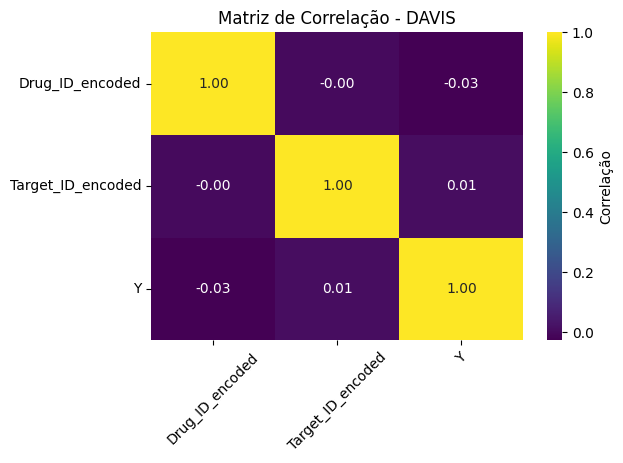

In [15]:
# Calcular a matriz de correlação para variáveis relevantes no dataset DAVIS
# Converter Drug_ID e Target_ID em numéricos
df['Drug_ID_encoded'] = LabelEncoder().fit_transform(df['Drug_ID'])
df['Target_ID_encoded'] = LabelEncoder().fit_transform(df['Target_ID'])

# Calcular a matriz de correlação
corr_matrix = df[['Drug_ID_encoded', 'Target_ID_encoded', 'Y']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Correlação'})
plt.title("Matriz de Correlação - DAVIS")
plt.xticks(rotation=45)  # Rotacionar os labels do eixo X para o lado
plt.yticks(rotation=0)   # Labels do eixo Y permanecem horizontais
plt.show()



Valores próximos de +1 ou -1: Forte correlação positiva/negativa entre as variáveis.

Valores próximos de 0: Indicam baixa correlação.

- A correlação entre Drug_ID_encoded e Y é muito baixa (-0.03), indicando que o identificador da droga não tem uma relação linear significativa com a força da interação.
- A correlação entre Target_ID_encoded e Y também é muito baixa (0.01), sugerindo que o identificador do alvo biológico não está linearmente relacionado à força da interação.
- Drug_ID_encoded e Target_ID_encoded são completamente independentes (correlação de 0.00).

In [16]:
## -> A droga que em  geral apresentou melhores interações
mean_kd_per_drug = df.groupby('Drug_ID')['Y'].mean().reset_index()
mean_kd_per_drug.columns = ['Drug_ID', 'Mean_Kd']

drug_with_lowest_kd = mean_kd_per_drug.sort_values(by='Mean_Kd').iloc[0]
# Exibindo a droga com o menor Mean_Kd
print("Droga com o menor valor médio de Kd:")
print(drug_with_lowest_kd)

## -> Melhor interação registada
best_interaction = df.iloc[df["Y"].idxmin()]
best_interaction_triplet = (best_interaction["Drug_ID"], best_interaction["Target_ID"], best_interaction["Y"])
print("\nMelhor interação registada:")
print(best_interaction_triplet)

Droga com o menor valor médio de Kd:
Drug_ID    44259.000000
Mean_Kd     1160.203868
Name: 1, dtype: float64

Melhor interação registada:
(3062316, 'ABL1p', 0.016)


#### Relatório da Exploração Inicial

- A análise da distribuição dos valores de Y, realizada através da estatística descritiva e análise gráfica, evidencia uma ampla dispersão dos dados, que apresentam diferentes ordens de grandeza. Considerando a recomendação de processamento presente no próprio repositório, sugere-se a aplicação de uma transformação logarítmica para aprimorar a análise dos valores;

- Todas as drogas apresentam o mesmo número de interações com os alvos, o que pode influenciar o desempenho do modelo de ML. Essa uniformidade pode facilitar o aprendizado de padrões básicos, mas também pode limitar a capacidade do modelo de captar relações mais sutis que impactam a constante Kd;

- Modelos não supervisionados ou de análise exploratória podem ser usados para entender como as interações e as características das drogas afetam os valores de Kd antes de treinar modelos de previsão.

- Os features Drug e Target estão em representações SMILES e sequências de aminoácidos, respectivamente. Para análises de ML e deep learning é preciso transformar esses features em formatos numéricos para que os modelos possam entender, uma vez que não operam diretamente em strings.

### 1.3) Processamento dos dados

In [17]:
pip install transformers

In [18]:
pip  install torch

In [19]:
## Livrarias necessárias para essa  secção
from sklearn.preprocessing import LabelEncoder

import scipy.cluster.hierarchy as sch
from rdkit import Chem
from rdkit.Chem import AllChem

from transformers import BertTokenizer, BertModel
import torch
import numpy as np

count    25772.000000
mean      7558.112997
std       3990.013578
min          0.016000
25%       3775.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: Y, dtype: float64


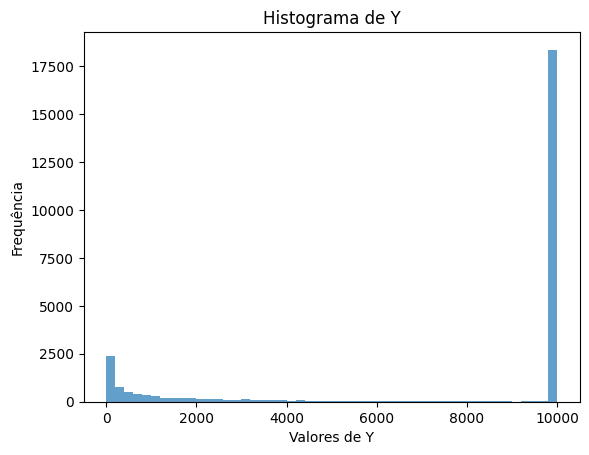

In [20]:
# Exibir estatísticas básicas
print(df['Y'].describe())


# Plotar o histograma de Y
plt.hist(df['Y'], bins=50, alpha=0.7)
plt.title('Histograma de Y')
plt.xlabel('Valores de Y')
plt.ylabel('Frequência')
plt.show()

Mesmo não tendo presença de outliers, é possível ver uma baixa frequência de dados entorno de Kd baixos. É sugerido, no repositório do dataset,  a transformação logarítmica do "Y", o que faz bastante sentido, devido a dispersão dos dados.

In [21]:
## Transformação logarítmica do "Y":

data = DTI(name = 'DAVIS')
data.convert_to_log(form = 'binding')

Found local copy...
Loading...
Done!
To log space...


In [22]:
# Extrair os dados após a conversão da variável Y.
df = data.get_data()
df

,Drug_ID,Drug,Target_ID,Target,Y
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.365523
1,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL1p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,4.999996
2,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ABL2,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...,4.999996
3,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...,4.999996
4,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,ACVR1B,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...,4.999996
...,...,...,...,...,...
25767,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,4.999996
25768,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,4.999996
25769,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721224
25770,151194,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356537


In [23]:
df = df.drop_duplicates()

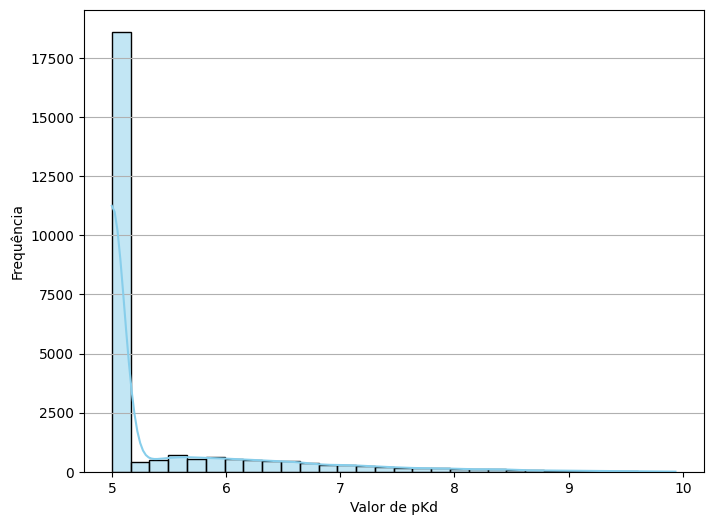

In [24]:
# Gera o histograma de Y após a tranformação logarítmica
plt.figure(figsize=(8, 6))
sns.histplot(df['Y'], bins=30, kde=True, color='skyblue')
plt.xlabel("Valor de pKd")
plt.ylabel("Frequência")
plt.grid(axis='y')
plt.show()

Após a transformação logarítmica, o Y que representava o Kd, torna-se pKd. Neste caso, **quanto maior o pKd melhor é a interação droga-alvo**.

Com o histograma é possível observar que há um elevado número de interações fracas.

In [25]:
# Converte dados SMILES em dados numéricos (Morgan Fingerprints)
def smiles_to_MF(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(n_bits)  # Retorna um vetor de zeros se a molécula não for válida
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))

# Aplica a função na coluna Drug
data_Drug = np.array([smiles_to_MF(smiles) for smiles in df['Drug']])
data_Drug

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Transforma aminoácidos para índices
aminoacids = "ACDEFGHIKLMNPQRSTVWY"
aminoacids_to_idx = {aa: idx for idx, aa in enumerate(aminoacids)}

# Converte as sequência de aminoácidos em um vetor (one-hot)
def aminoacids_to_vector(seq, max_len=100):
    vector = np.zeros((max_len, len(aminoacids)))
    for i, aa in enumerate(seq[:max_len]):
        if aa in aminoacids_to_idx:
            vector[i, aminoacids_to_idx[aa]] = 1
    return vector.flatten()

# Aplica a função na coluna Target
data_Target = np.array([aminoacids_to_vector(seq) for seq in df['Target']])

Com o obejtivo de agregar mais informação no dataset, foi realizada a transformação das sequências de aminoácidos das proteínas em embeddings.

**Embeddings** são utilizados para converter sequências de proteínas e estruturas químicas em vetores numéricos, facilitando a sua utilização em métodos computacionais. Assim sendo, foi utilizado o modelo ProtBERT, que captura padrões biológicos e semânticos das sequências de proteínas.

In [27]:
# Carregar o ProtBERT pré-treinado
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = AutoModel.from_pretrained("Rostlab/prot_bert")

# Colocar o modelo em modo de inferência
model.eval()

# Função para gerar embeddings
def generate_protbert_embedding(sequence):
    # Adicione espaços entre os aminoácidos (necessário para o ProtBERT)
    spaced_sequence = " ".join(sequence)

    # Tokenizar a sequência
    tokens = tokenizer(spaced_sequence, return_tensors="pt", add_special_tokens=True)

    # Gerar os embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Usar a média dos embeddings de todas as camadas
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

In [28]:
unique_targets = df[['Target_ID', 'Target']].drop_duplicates(subset=['Target_ID', 'Target'])
print(unique_targets)

    Target_ID                                             Target
0        AAK1  MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
1       ABL1p  PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
2        ABL2  MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...
3       ACVR1  MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...
4      ACVR1B  MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...
..        ...                                                ...
374       YES  MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...
375      YSK1  MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...
376      YSK4  MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...
377       ZAK  MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...
378     ZAP70  MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGY...

[379 rows x 2 columns]


In [ ]:
"""
#PROCESSO DEMORADO!
dict_embeddings = {}

for index, row in unique_targets.iterrows():
    #target_id = row['Target_ID']
    #sequence = row['Target']
    #dict_embeddings[target_id] = generate_protbert_embedding(sequence)

"""



"\n#PROCESSO DEMORADO!\ndict_embeddings = {}\n\nfor index, row in unique_targets.iterrows():\n    #target_id = row['Target_ID']\n    #sequence = row['Target']\n    #dict_embeddings[target_id] = generate_protbert_embedding(sequence)\n\n"

In [ ]:
"""
#fazer o download do csv. Uma fez que a obtenção de embeddings é demorada vamos usar o documento csv e não reporduzir o processo toda vez.
from google.colab import files

# Converter os embeddings para DataFrame
data = [(target_id, embedding.tolist()) for target_id, embedding in dict_embeddings.items()]
df_embeddings = pd.DataFrame(data, columns=['Target_ID', 'Embeddings'])

# Salvar o DataFrame em um arquivo CSV
df_embeddings.to_csv('embeddings_targets.csv', index=False)

# Fazer o download do arquivo CSV
files.download('embeddings_targets.csv')
"""


"\n#fazer o download do csv. Uma fez que a obtenção de embeddings é demorada vamos usar o documento csv e não reporduzir o processo toda vez.\nfrom google.colab import files\n\n# Converter os embeddings para DataFrame\ndata = [(target_id, embedding.tolist()) for target_id, embedding in dict_embeddings.items()]\ndf_embeddings = pd.DataFrame(data, columns=['Target_ID', 'Embeddings'])\n\n# Salvar o DataFrame em um arquivo CSV\ndf_embeddings.to_csv('embeddings_targets.csv', index=False)\n\n# Fazer o download do arquivo CSV\nfiles.download('embeddings_targets.csv')\n"

In [29]:
## Importar o csv com os embeddings
from google.colab import files

# Carregar o arquivo CSV
uploaded = files.upload()

# carregar o arquivo CSV
import pandas as pd

df_embeddings = pd.read_csv('embeddings_targets.csv')

# Exibir as primeiras linhas do dataframe
df_embeddings.head()

Saving embeddings_targets.csv to embeddings_targets.csv


,Target_ID,Embeddings
0,AAK1,"[0.15718942880630493, 0.013413864187896252, -0..."
1,ABL1p,"[0.13038086891174316, -0.013016059063374996, 0..."
2,ABL2,"[0.1386459618806839, 0.004535922314971685, 0.0..."
3,ACVR1,"[0.14593058824539185, 0.09494800120592117, -0...."
4,ACVR1B,"[0.20122450590133667, 0.06451524049043655, -0...."


##### Junção dos features ao dataset

In [30]:
df_final = df.copy()
df_final["Drug_MF"] = data_Drug.tolist()
df_final["Target_one_hot"] = data_Target.tolist()

In [31]:
df_final = pd.merge(df_final, df_embeddings, on='Target_ID', how='left')
df_final.columns

Index(['Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y', 'Drug_MF',
       'Target_one_hot', 'Embeddings'],
      dtype='object')

## **2) Análise não supervisionada**


In [32]:
from sklearn.decomposition import PCA
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split

### **2.1) Técnicas de redução de dimensionalidade**

##### PCA

O PCA (Análise de Componentes Principais) é uma técnica estatística usada para reduzir a dimensionalidade de um conjunto de dados, mantendo o máximo de informação possível.
Optámos por aplicar o PCA tanto nos embeddings como nos Morgan Fingerprints uma vez que é essencial para reduzir a dimensionalidade de ambas as representações, permitindo a identificação de padrões relevantes em espaços mais compactos, além de facilitar a integração das duas fontes de informação para análises mais abrangentes e visualizações mais interpretáveis.

In [34]:
df_final['Embeddings'] = df_final['Embeddings'].apply(ast.literal_eval)

In [35]:
# Converter strings para listas numéricas
df_embeddings['Embeddings'] = df_embeddings['Embeddings'].apply(ast.literal_eval)

# Verificar se a conversão foi bem-sucedida
print(df_embeddings['Embeddings'].head())

0    [0.15718942880630493, 0.013413864187896252, -0...
1    [0.13038086891174316, -0.013016059063374996, 0...
2    [0.1386459618806839, 0.004535922314971685, 0.0...
3    [0.14593058824539185, 0.09494800120592117, -0....
4    [0.20122450590133667, 0.06451524049043655, -0....
Name: Embeddings, dtype: object


In [36]:
embeddings_matrix = np.vstack(df_embeddings['Embeddings'].values)
print(f"Forma original dos embeddings: {embeddings_matrix.shape}")

Forma original dos embeddings: (379, 1024)


In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(embeddings_matrix)

# Aplicar PCA para reter 95% da variância
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)

# Verificar as dimensões após o PCA
print(f"Dimensões dos dados após o PCA: {reduced_data.shape}")

# Exibir o número de componentes
print(f"Número de componentes selecionados: {pca.n_components_}")



Dimensões dos dados após o PCA: (379, 115)
Número de componentes selecionados: 115


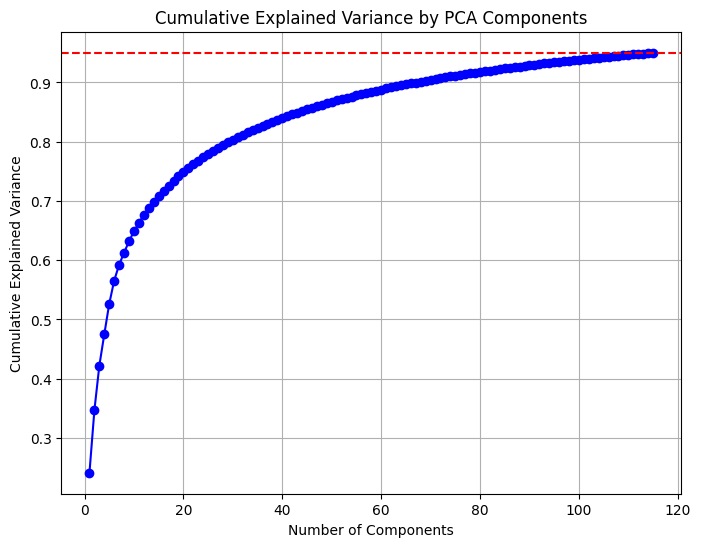

Variance explained by the first component: 0.24
Variance explained by the second component: 0.11
Number of components selected by PCA to retain 95% variance: 115


In [38]:
# Variância explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.axhline(y=0.95, color='r', linestyle='--')  # Linha para 95% da variância explicada
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Variance explained by the first component: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Variance explained by the second component: {pca.explained_variance_ratio_[1]:.2f}')
print(f"Number of components selected by PCA to retain 95% variance: {pca.n_components_}")


- PC1 explica 24% da variância total do conjunto de dados, o que é significativo, mas não dominante.
Já o PC2 contribui com 11%, indicando que, juntas, as duas primeiras componentes explicam 35% da variância.

- O gráfico mostra uma curva característica onde os primeiros componentes principais explicam a maior parte da variância. Após os primeiros componentes, o ganho em variância explicada por componente diminui significativamente (curva assintótica).
- Isso significa que os dados possuem uma estrutura que exige muitas componentes para capturar a maior parte da variância.

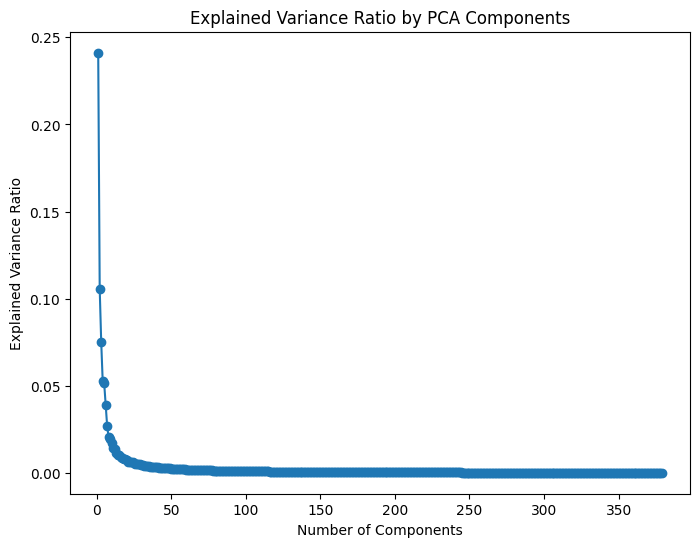

In [39]:
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Explained Variance Ratio by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [40]:
import pandas as pd

# Definir os intervalos de pKd
bins = [-float('inf'), 6, 8, float('inf')]  # Valores de pKd < 6, 6 ≤ pKd ≤ 8, pKd > 8
labels = ['Low', 'Medium', 'High']  # Categorias de afinidade

# Adicionar uma nova coluna com as categorias
Affinity_Group = pd.cut(df_final['Y'], bins=bins, labels=labels)

# Verificar quantos valores caem em cada categoria
category_counts = Affinity_Group.value_counts()

# Exibir o número de valores em cada categoria
print(category_counts)

Y
Low       21425
Medium     3732
High        615
Name: count, dtype: int64


In [41]:
## A determinação das categorias foram definidas com base em artigos (10.1021/acs.jcim.3c01208, 10.1002/jcc.20893)
def categorize_pKd(pKd):
    if pKd < 6:
        return 'Low'
    elif 6 <= pKd < 8:
        return 'Medium'
    else:
        return 'High'

df_final["Affinity_Group"] = df_final['Y'].apply(categorize_pKd)
print(df_final[['Target_ID', 'Y', 'Affinity_Group']].head())

  Target_ID         Y Affinity_Group
0      AAK1  7.365523         Medium
1     ABL1p  4.999996            Low
2      ABL2  4.999996            Low
3     ACVR1  4.999996            Low
4    ACVR1B  4.999996            Low


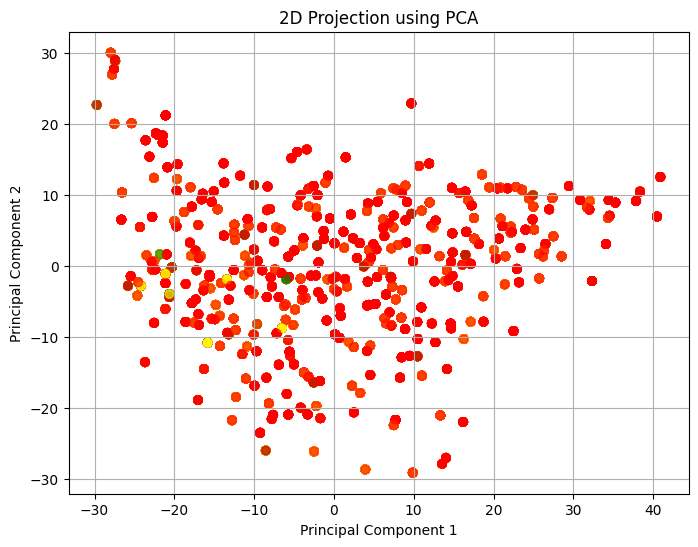

In [42]:
embeddings_matrix = np.vstack(df_final['Embeddings'].values)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(embeddings_matrix)

# Aplicar PCA para reduzir para 2 componentes principais
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(scaled_data)

# Mapeamento de cores para as categorias de 'Affinity_Group'
color_map = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}

# Criar vetor de cores com base nas categorias
colors = df_final['Affinity_Group'].map(color_map)

# Gráfico 2D das primeiras componentes principais com cores baseadas em 'Affinity_Group'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=colors, alpha=0.6)

# Adicionar título e rótulos
plt.title("2D Projection using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()

Este gráfico representa os dados reduzidos para duas componentes principais, com as cores indicando as categorias de afinidade (Low, Medium, High).
- Vermelho: Afinidade baixa.
- Amarelo: Afinidade média.
- Verde: Alta afinidade.

As categorias parecem misturadas em algumas regiões, mas é possível observar que a afinidade "High" (verde) aparece em áreas isoladas e dispersas, sugerindo que os compostos com alta afinidade têm características distintas.
Embora exista alguma sobreposição entre Low (vermelho) e Medium (amarelo), há uma certa separação nos extremos, especialmente entre os pontos de afinidade alta e os demais.
A sobreposição indica que as duas primeiras componentes principais podem não capturar toda a variabilidade para distinguir claramente as categorias.

##### PCA Morgan Fingerprints:

In [43]:
# Extrair os Morgan Fingerprints em formato de matriz
mf_matrix = np.vstack(df_final["Drug_MF"].values)
print(f"Forma original dos Morgan Fingerprints: {mf_matrix.shape}")

scaler_mf = StandardScaler()
scaled_mf = scaler_mf.fit_transform(mf_matrix)

# Aplicar PCA para Morgan Fingerprints, mantendo 95% da variância
pca_mf = PCA(n_components=0.95)
reduced_mf = pca_mf.fit_transform(scaled_mf)

# Verificar as dimensões após PCA
print(f"Dimensões dos Morgan Fingerprints após PCA: {reduced_mf.shape}")
print(f"Número de componentes selecionados para Morgan Fingerprints: {pca_mf.n_components_}")


Forma original dos Morgan Fingerprints: (25772, 1024)
Dimensões dos Morgan Fingerprints após PCA: (25772, 58)
Número de componentes selecionados para Morgan Fingerprints: 58


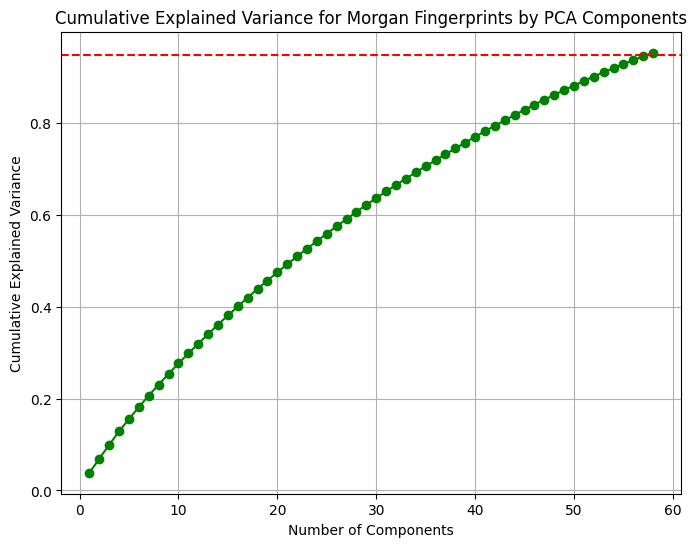

In [44]:
# Variância explicada acumulada para Morgan Fingerprints
cumulative_variance_mf = np.cumsum(pca_mf.explained_variance_ratio_)

# Visualização da variância explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_mf) + 1), cumulative_variance_mf, marker='o', color='g')
plt.axhline(y=0.95, color='r', linestyle='--')  # Linha para 95% da variância explicada
plt.title("Cumulative Explained Variance for Morgan Fingerprints by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


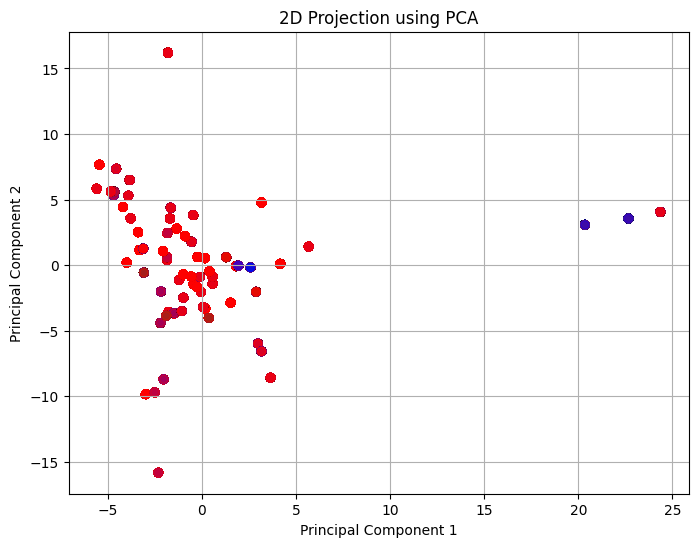

In [47]:
color_map = {'Low': 'red', 'Medium': 'blue', 'High': 'green'}

# Criar vetor de cores com base nas categorias
colors = df_final['Affinity_Group'].map(color_map)

# Gráfico 2D das primeiras componentes principais com cores baseadas em 'Affinity_Group'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_mf[:, 0], reduced_mf[:, 1], c=colors, alpha=0.6)

# Adicionar título e rótulos
plt.title("2D Projection using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()

De acordo com este gráfico, as categorias "Low" (vermelho) dominam a região central, enquanto "High" (verde) forma pequenos grupos isolados, indicando que os compostos com alta afinidade possuem fingerprints bastante distintos.

Já as afinidades médias (azul) aparecem em transição entre Low e High, o que faz sentido quimicamente, pois podem compartilhar características intermediárias.

Relevância dos Morgan Fingerprints: O facto de as categorias estarem parcialmente separadas sugere que os Morgan Fingerprints capturam informações relevantes para a classificação de afinidade.

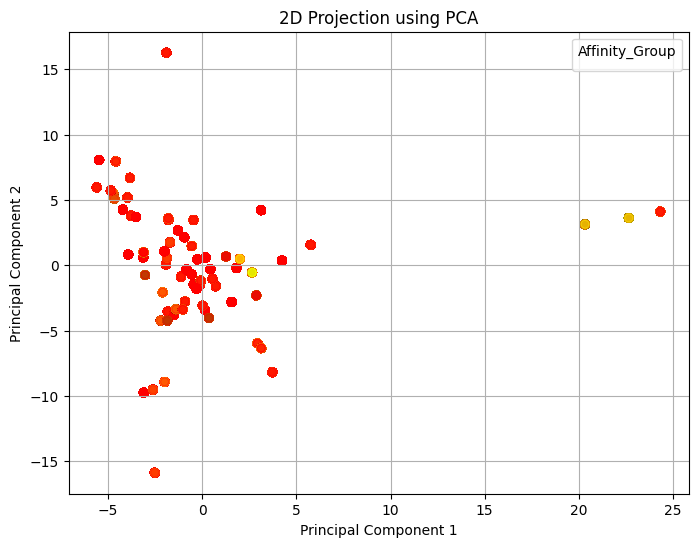

In [48]:
mf_matrix = np.vstack(df_final["Drug_MF"].values)
oh_matrix = np.vstack(df_final['Target_one_hot'].values)

# Normalizar ambas as matrizes separadamente
scaler_mf = StandardScaler()
scaler_oh = StandardScaler()

mf_scaled = scaler_mf.fit_transform(mf_matrix)
oh_scaled = scaler_oh.fit_transform(oh_matrix)

# Aplicar PCA separadamente em ambas as matrizes (por exemplo, 2 componentes principais)
pca_mf = PCA(n_components=2)
reduced_mf = pca_mf.fit_transform(mf_scaled)

pca_oh = PCA(n_components=2)
reduced_oh = pca_oh.fit_transform(oh_scaled)

# Combinar as componentes principais
data_combined = np.hstack([reduced_mf, reduced_oh])

# Mapeamento de cores para as categorias de Affinity_Group
color_map = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}
colors = df_final['Affinity_Group'].map(color_map)

# Gráfico 2D das primeiras componentes principais com cores baseadas em 'Affinity_Group'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_combined[:, 0], data_combined[:, 1], c=colors, alpha=0.6)

# Adicionar título e rótulos
plt.title("2D Projection using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()

# Adicionar legenda
plt.legend(handles=scatter.legend_elements()[0], labels=color_map.keys(), title="Affinity_Group")

plt.show()

- O grupo "Low" (vermelho) domina o gráfico, sugerindo que a maioria dos dados possui baixa afinidade.
- O grupo "Medium" (amarelo) está presente, mas com menos pontos, espalhados tanto no agrupamento central quanto em regiões mais afastadas.
- Não existem pontos verdes ("High") no gráfico, o que pode indicar que fármacos ou interações com alta afinidade são raros ou ausentes no conjunto de dados.

Conclusões gerais:

- A clara separação de High sugere que os dados têm uma representação significativa nas dimensões reduzidas, o que pode ser útil para classificação ou análise de afinidade.

- Os Morgan Fingerprints parecem ser mais compactos em termos de variância explicada do que os embeddings gerais.


#####**t-SNE**
O t-SNE (t-Distributed Stochastic Neighbor Embedding) é uma técnica poderosa para visualização de dados de alta dimensionalidade, especialmente em comparação com o PCA:

| Aspecto          | **PCA**                                            | **t-SNE**                                          |
|-------------------|---------------------------------------------------|---------------------------------------------------|
| **Tipo de Redução** | Linear                                           | Não-linear                                        |
| **Preservação**    | Foca na preservação da **variância global** dos dados. | Foca na preservação das **relações locais** entre os pontos. |
| **Componentes**    | Gera **componentes ortogonais** que explicam a variância. | Não gera componentes; cria uma nova projeção.     |
| **Velocidade**     | Muito mais rápido, eficiente em datasets grandes. | Mais lento, especialmente em datasets maiores.    |
| **Finalidade**     | Melhora a explicação da variância. | Ideal para **descobrir padrões ou clusters escondidos**. |



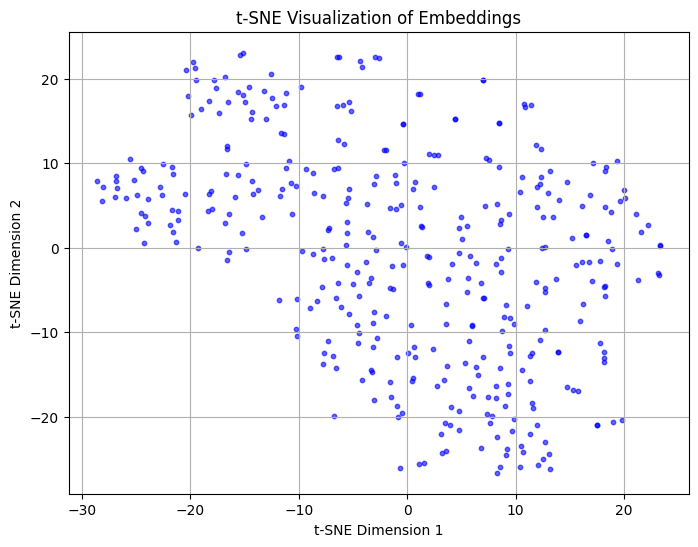

In [51]:
# Gerar t-SNE para os embeddings reduzidos pelo PCA
tsne_embeddings = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_2d_tsne = tsne_embeddings.fit_transform(reduced_data)

# Plot dos resultados para os embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1], alpha=0.6, s=10, color='blue')
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid()
plt.show()


O gráfico dos embeddings apresenta pontos relativamente próximos entre si e com alguma estrutura aparente. Isso sugere que os embeddings possuem características subentendidas, que podem estar agrupando moléculas de maneira semântica.

Apesar de não estarem perfeitamente definidos, existem regiões onde os pontos se agrupam mais fortemente, sugerindo a presença de possíveis clusters naturais no conjunto de embeddings.

Conclusão: A redução de dimensionalidade com PCA seguida do t-SNE foi eficaz em capturar relações subentendidas nos embeddings. Isso pode ser explorado para clustering ou visualização de padrões relacionados às interações drug-target.

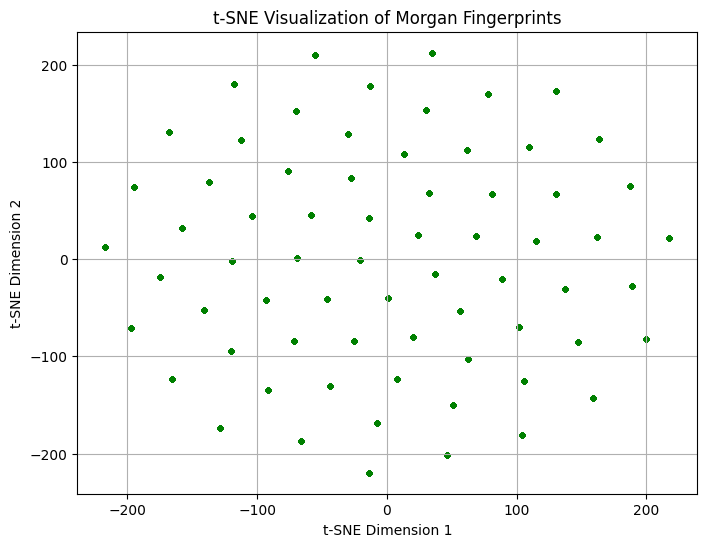

In [53]:
# Gerar t-SNE para os Morgan Fingerprints reduzidos pelo PCA
tsne_fingerprints = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
fingerprints_2d_tsne = tsne_fingerprints.fit_transform(reduced_mf)

# Plot dos resultados para os Morgan Fingerprints
plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_2d_tsne[:, 0], fingerprints_2d_tsne[:, 1], alpha=0.6, s=10, color='green')
plt.title("t-SNE Visualization of Morgan Fingerprints")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid()
plt.show()


Os pontos estão muito dispersos, com valores extremos ao longo de ambas as dimensões (-200 a 200), o que pode indicar que os Morgan Fingerprints contêm informações mais dispersas ou apresentam maior variabilidade.

Ao contrário do que aconteceu com os embeddings, não há clusters claros. Isso sugere que os fingerprints podem conter menos relações úteis para clustering neste caso específico.

### **2.2) Clustering dos dados**

#####**K-Means**
 K-means é um algoritmo de agrupamento não supervisionado baseado na distância, em que os pontos de dados que estão próximos uns dos outros são agrupados num determinado número de clusters/grupos.

É um dos algoritmos de agrupamento mais utilizados no domínio da ciência dos dados. Para implementar com êxito o algoritmo k-means, temos de identificar o número de clusters que queremos criar utilizando o k-means.


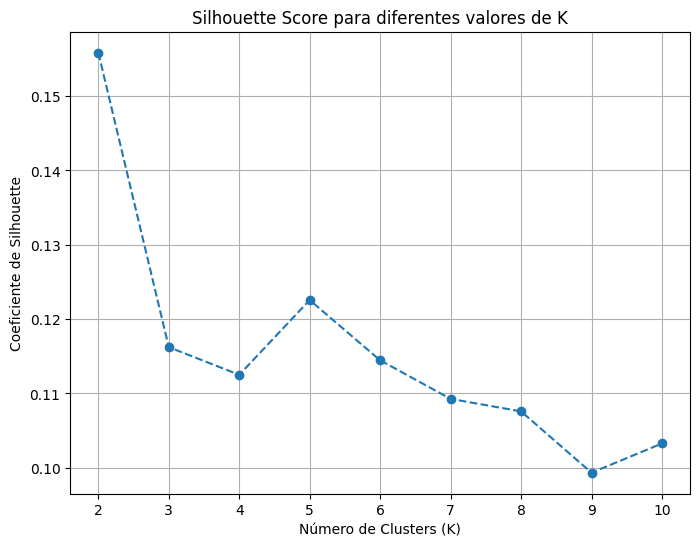

O melhor valor de K é: 2


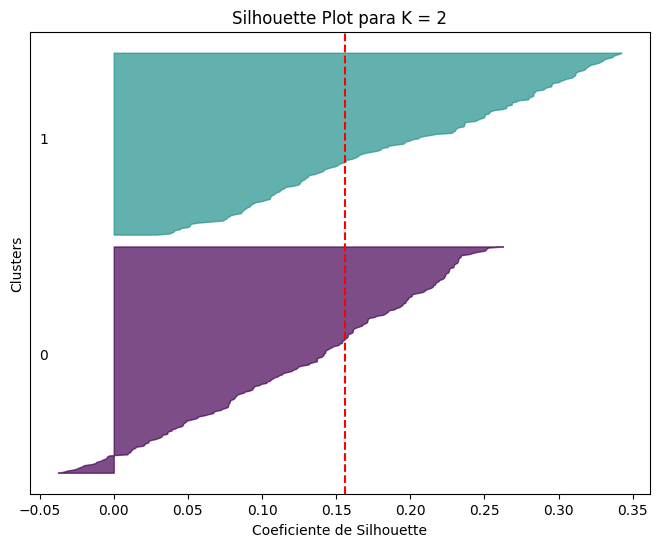

In [ ]:
# Determinar o número de clusters (K)
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)  # Use o reduced_data após PCA
    score = silhouette_score(reduced_data, cluster_labels)
    silhouette_scores.append(score)

# Gráfico do coeficiente de Silhouette
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silhouette')
plt.grid(True)
plt.show()

# Melhor K
best_k = k_values[np.argmax(silhouette_scores)]
print(f'O melhor valor de K é: {best_k}')

# Aplicar K-Means com o melhor K
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)
silhouette_vals = silhouette_samples(reduced_data, cluster_labels)

# Silhouette Plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(best_k):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.viridis(float(i) / best_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

    y_lower = y_upper + 10

plt.title('Silhouette Plot para K = ' + str(best_k))
plt.xlabel('Coeficiente de Silhouette')
plt.ylabel('Clusters')
plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks([])
plt.show()

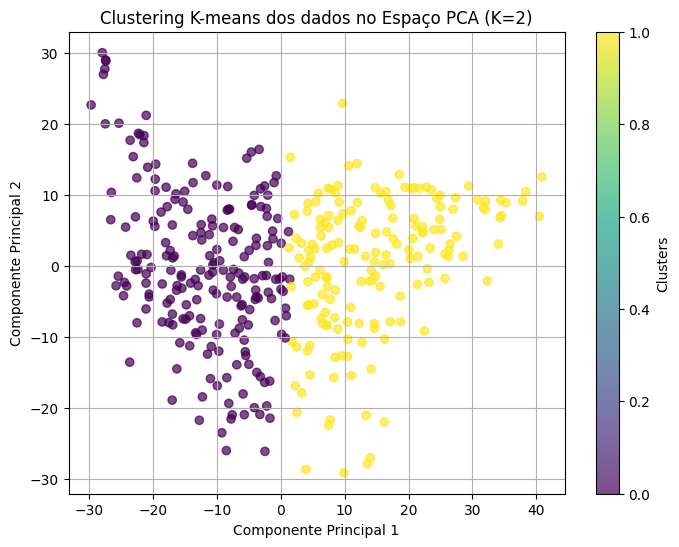

In [ ]:
# Ajustar o K-Means com o melhor K encontrado
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Reduzir para 2 componentes principais para visualização
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(reduced_data)

# Gráfico dos clusters no espaço PCA 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(label="Clusters")
plt.title(f"Clustering K-means dos dados no Espaço PCA (K={best_k})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

O gráfico mostra dois clusters bem definidos, indicando que o K-Means conseguiu separar os dados de forma significativa no espaço PCA reduzido.
Os pontos amarelos e roxos formam dois grupos que possuem uma boa separação, o que sugere que o agrupamento representa diferenças reais nos dados.

Diferentes algoritmos de clusterização, utilizando os dados reduzidos pelo PCA:





| **Aspecto**               | **DBSCAN**                                                    | **Hierarchical Clustering**                            | **Gaussian Mixture Models (GMM)**                       |
|---------------------------|--------------------------------------------------------------|-------------------------------------------------------|--------------------------------------------------------|
| **Base do Método**         | Agrupa com base na **densidade** dos pontos.                 | Forma clusters **hierárquicos** (aglomerativos ou divisivos). | Assume que os dados vêm de uma combinação de **distribuições gaussianas**. |
| **Parâmetros Importantes** | `eps` (distância máxima) e `min_samples` (pontos mínimos).   | `n_clusters` (número de clusters).                   | `n_components` (número de distribuições gaussianas).    |
| **Forma dos Clusters**     | Lida bem com **formas arbitrárias** e detecta ruídos.         | Menos eficiente com clusters **não esféricos**.       | Geralmente funciona melhor com clusters **esféricos**. |
| **Ruído e Outliers**       | Identifica **outliers** como ruído (-1 nos rótulos).          | Não lida bem com **outliers**, os atribui a um cluster. | Não lida bem com **outliers** diretamente.              |
| **Escalabilidade**         | Melhor para datasets **pequenos a médios**.                  | Escala mal para datasets **muito grandes**.          | Razoável para datasets médios; sensível ao número de componentes. |
| **Uso Típico**             | **Clusters densos** e quando há ruídos.                      | Estruturas hierárquicas ou quando o número de clusters é desconhecido (dendrograma). | Modelagem probabilística, estimativa de densidade e clusters sobrepostos. |
| **Vantagens**              | Não requer número de clusters a priori; detecta formas complexas. | Pode representar relações hierárquicas (dendrograma). | Permite clusters **sobrepostos** e estima probabilidades. |
| **Desvantagens**           | Sensível à escolha dos parâmetros `eps` e `min_samples`.      | Requer escalonamento com métricas; pode ser computacionalmente caro. | Pode ser instável se os dados não forem gaussianos.     |


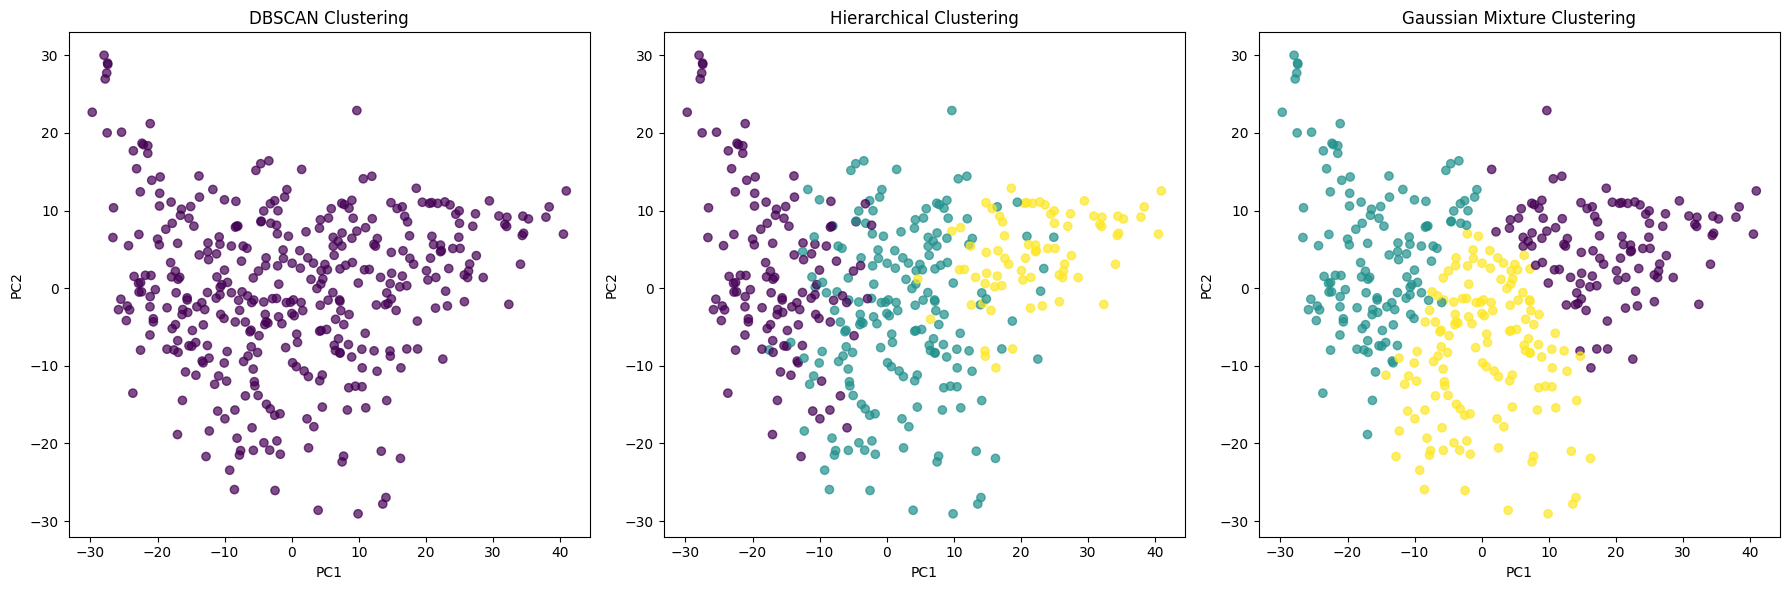

In [ ]:
# 1. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(reduced_data)

# 2. Hierarchical Clustering (Aglomerativo)
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical.fit_predict(reduced_data)

# 3. Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(reduced_data)

# Plotar os resultados para cada algorítmo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# DBSCAN
axes[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.7)
axes[0].set_title("DBSCAN Clustering")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Hierarchical
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], c=hierarchical_clusters, cmap='viridis', alpha=0.7)
axes[1].set_title("Hierarchical Clustering")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# GMM
axes[2].scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_clusters, cmap='viridis', alpha=0.7)
axes[2].set_title("Gaussian Mixture Clustering")
axes[2].set_xlabel("PC1")
axes[2].set_ylabel("PC2")

plt.tight_layout()
plt.show()


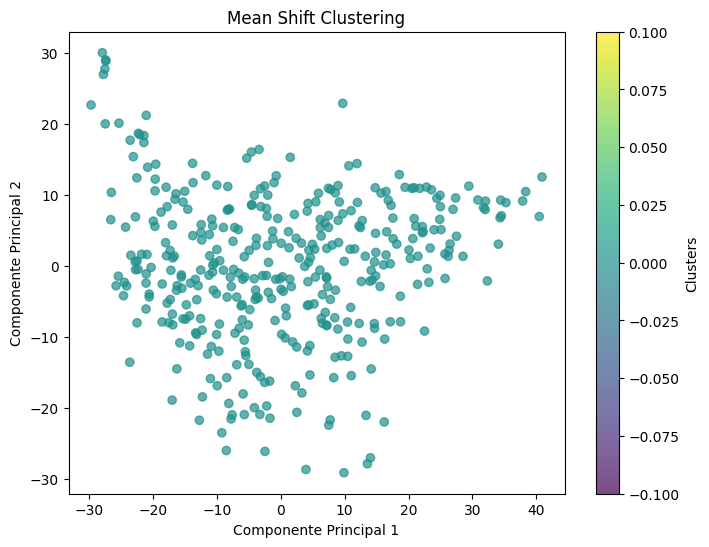

In [ ]:
# Estima a largura de banda (bandwidth) automaticamente com base nos dados
bandwidth = estimate_bandwidth(reduced_data, quantile=0.2, n_samples=500)

# Aplicação do algoritmo Mean Shift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_clusters = mean_shift.fit_predict(reduced_data)

# Visualização dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=mean_shift_clusters, cmap='viridis', alpha=0.7)
plt.title("Mean Shift Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Clusters")
plt.show()


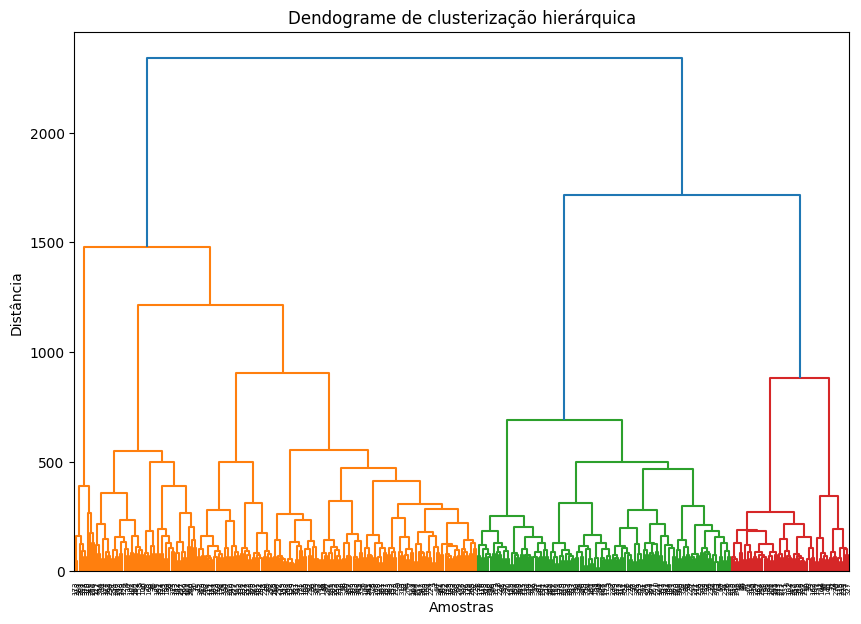

In [ ]:
m_distance = pairwise_distances(reduced_data, metric = 'euclidean')

# Criação do linkage matrix para o dendrograma
linkage_matrix = sch.linkage(m_distance, method='ward')  # "ward" minimiza a variância intracluster

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendograma de clusterização hierárquica")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()


## **3) Aprendizagem Máquina**


In [ ]:
# Convertendo as colunas para arrays NumPy
df_final['Drug_MF'] = df_final['Drug_MF'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df_final['Target_one_hot'] = df_final['Target_one_hot'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df_final['Embeddings'] = df_final['Embeddings'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))

In [ ]:
#Demorou uma hora a rodar isto
# Combinar as representações
X = np.array([np.concatenate([drug_mf, target_one_hot, embedding])
            for drug_mf, target_one_hot, embedding in zip(df_final['Drug_MF'], df_final['Target_one_hot'], df_final['Embeddings'])])

# A variável dependente 'Y'
y = df_final['Y'].values

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Avaliar cada modelo
for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    predictions = model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    # Exibir resultados
    print(f"Model: {model_name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print("="*50)

O modelo de Random Forest foi o mais eficaz, alcançando um R² de 51%, o que reflete sua capacidade superior de explicar a variabilidade dos dados. Além disso, apresentou os menores valores de erro absoluto e quadrático entre todos os modelos avaliados. Em contrapartida, a Decision Tree obteve o pior desempenho, com um R² próximo de zero, sugerindo dificuldades em capturar a variabilidade dos dados, possivelmente devido ao overfitting. O Gradient Boosting mostrou um desempenho intermediário, ficando aquém do Random Forest em termos de R². Já a Linear Regression apresentou um R² de 36%, evidenciando limitações na modelagem da complexidade dos dados.

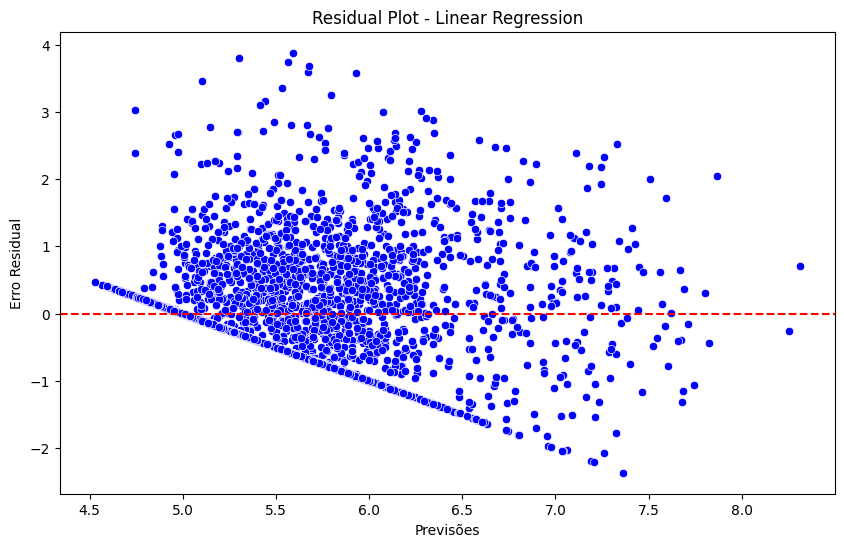

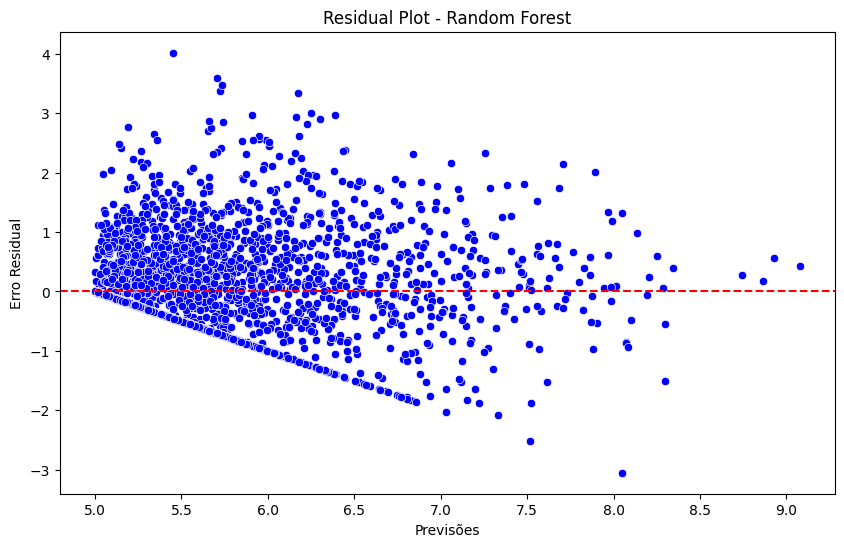

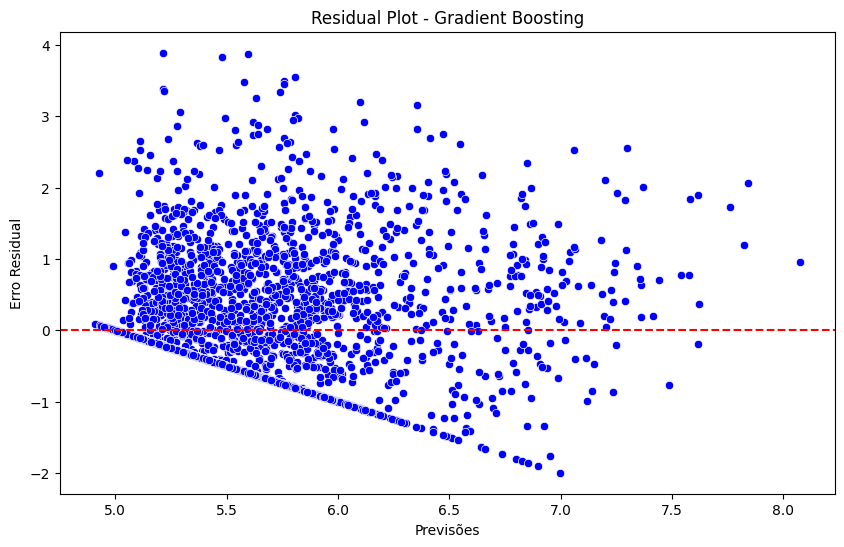

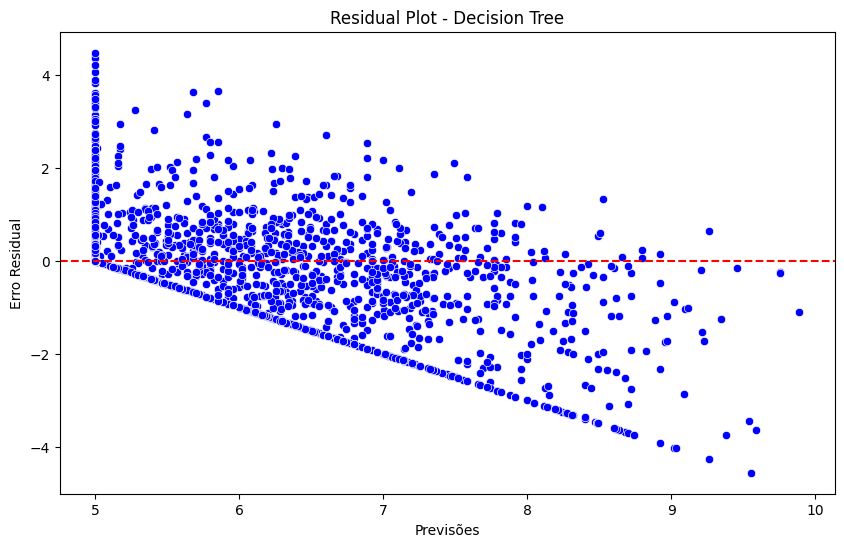

In [ ]:
# Após o loop de treinamento e avaliação dos modelos
for model_name, model in models.items():
    # Fazer previsões
    predictions = model.predict(X_test)

    # Calcular o erro residual
    residuals = y_test - predictions

    # Gráfico de erro residual
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals, color='blue')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot - {model_name}')
    plt.xlabel('Previsões')
    plt.ylabel('Erro Residual')
    plt.show()


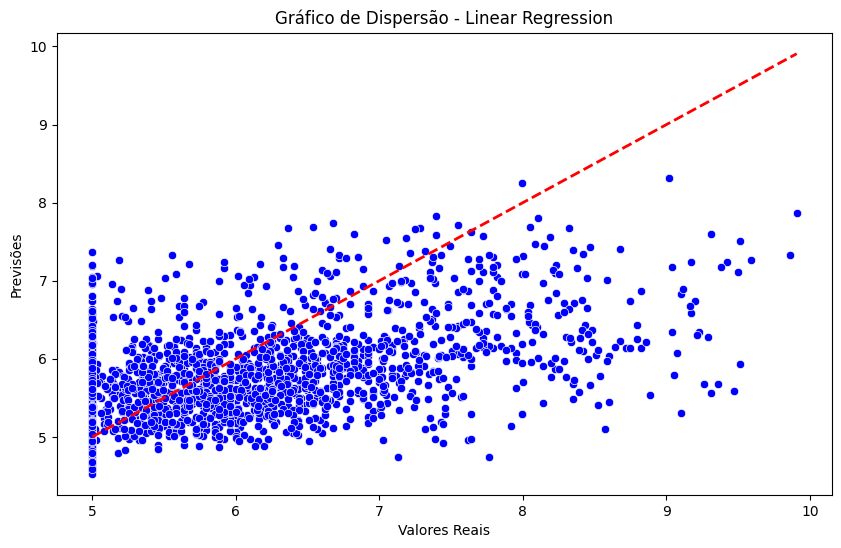

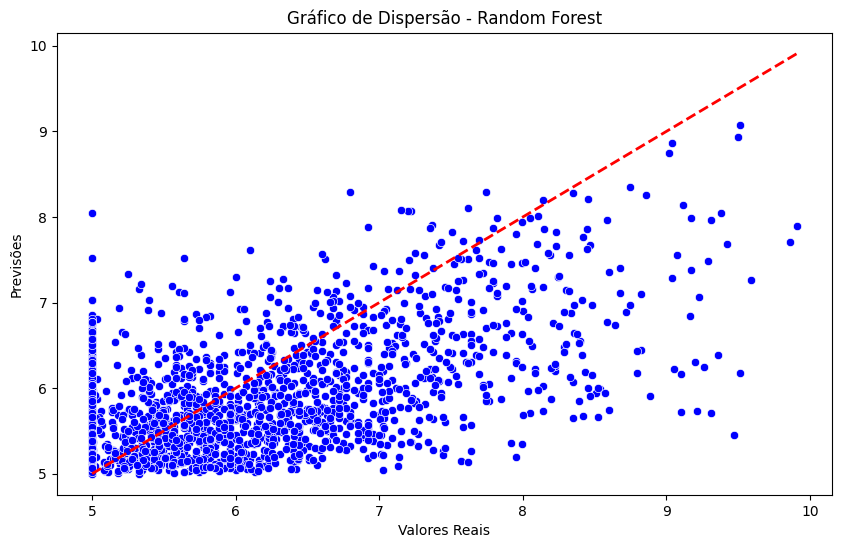

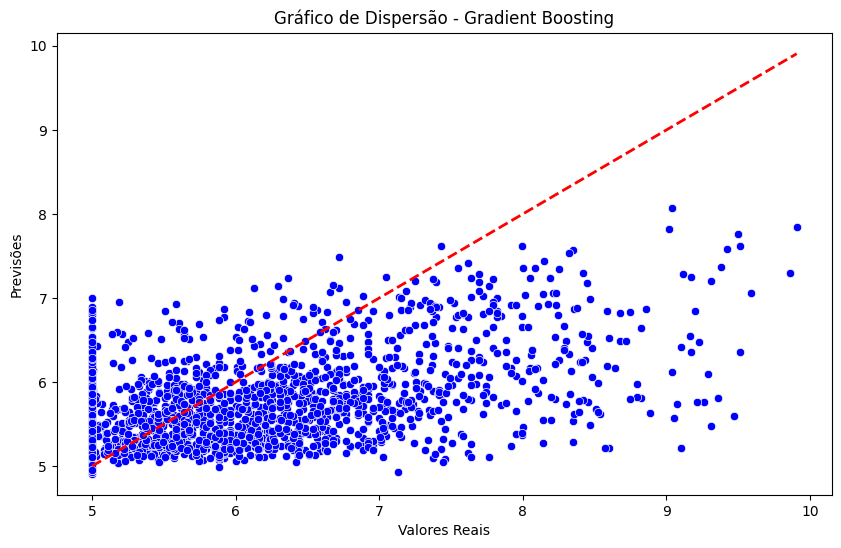

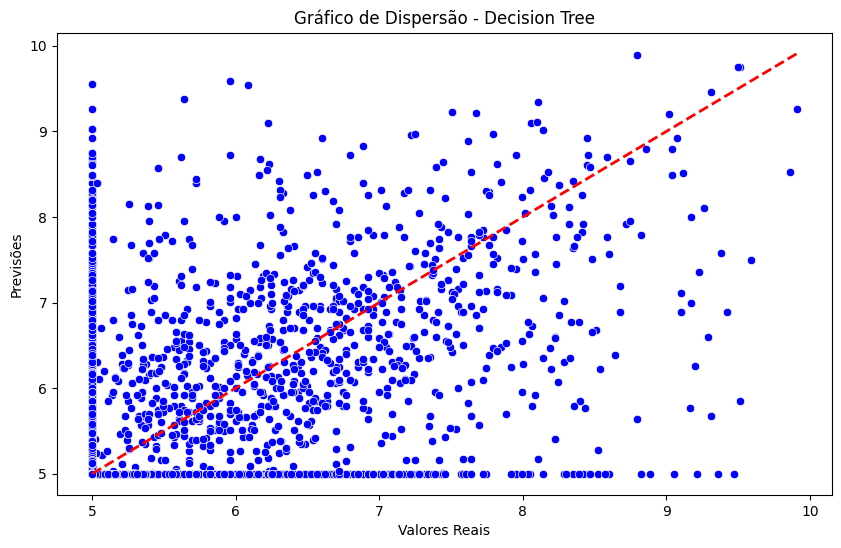

In [ ]:
# Após o loop de treinamento e avaliação dos modelos
for model_name, model in models.items():
    # Fazer previsões
    predictions = model.predict(X_test)

    # Gráfico de dispersão (previsões vs. valores reais)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha de identidade
    plt.title(f'Gráfico de Dispersão - {model_name}')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.show()


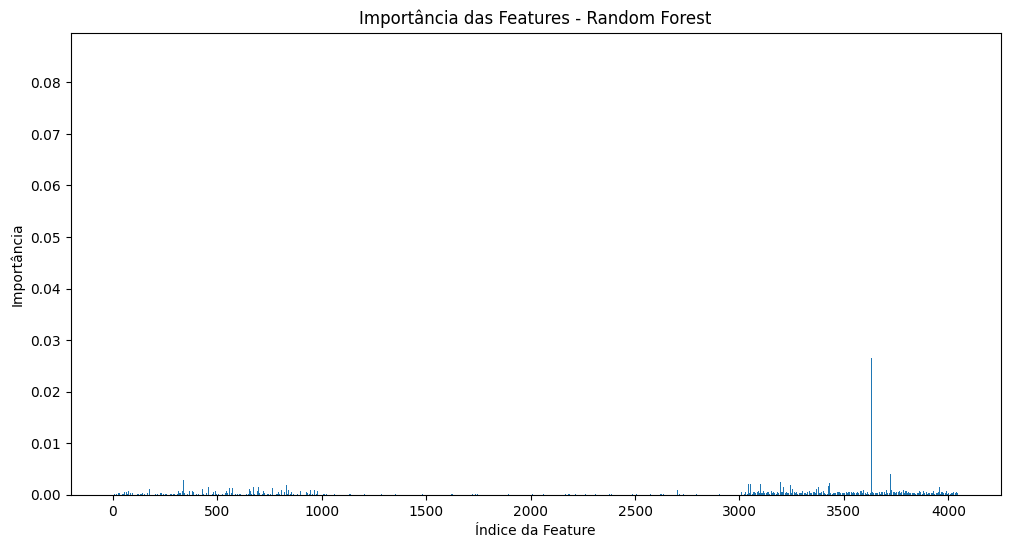

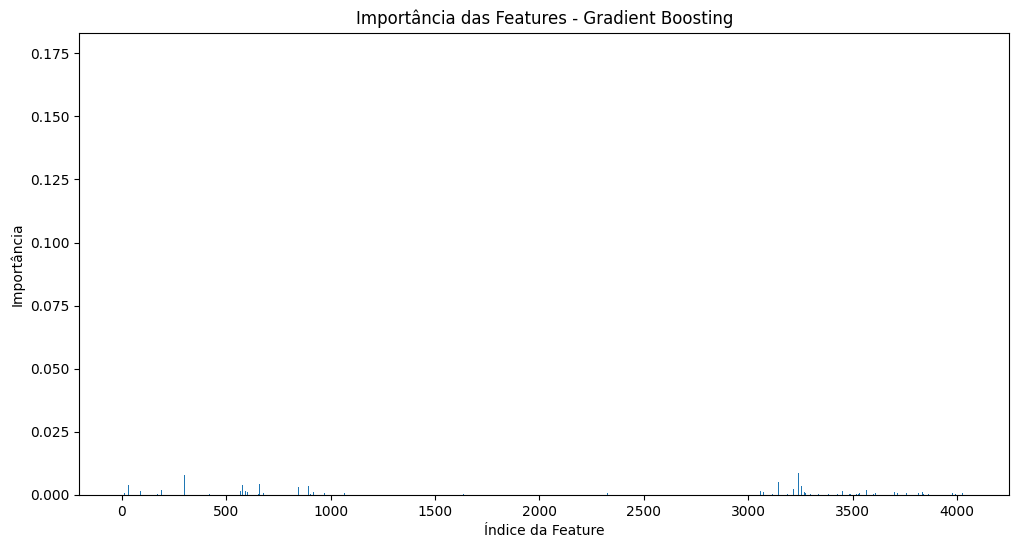

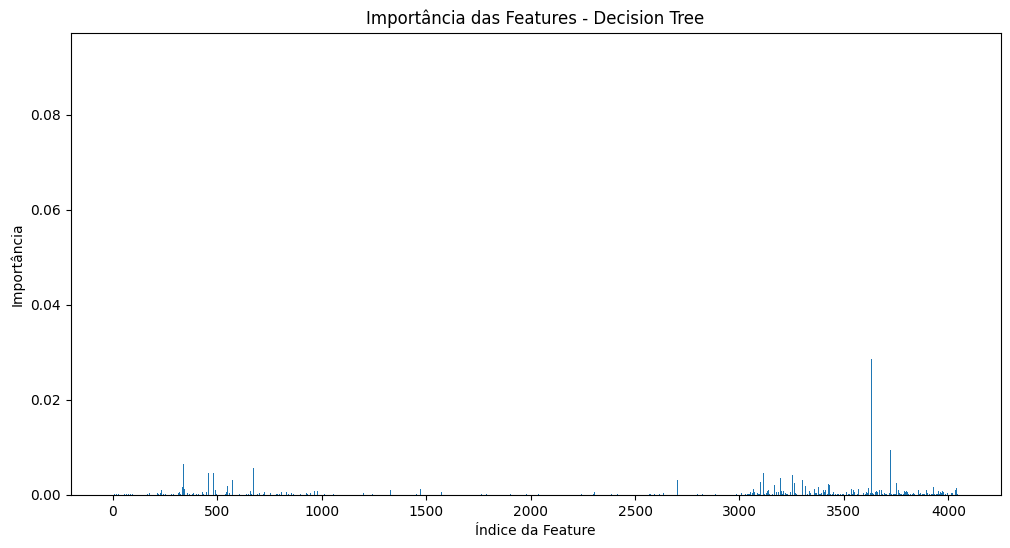

In [ ]:
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(12, 6))
        importance = model.feature_importances_
        plt.bar(range(len(importance)), importance)
        plt.title(f"Importância das Features - {model_name}")
        plt.xlabel("Índice da Feature")
        plt.ylabel("Importância")
        plt.show()


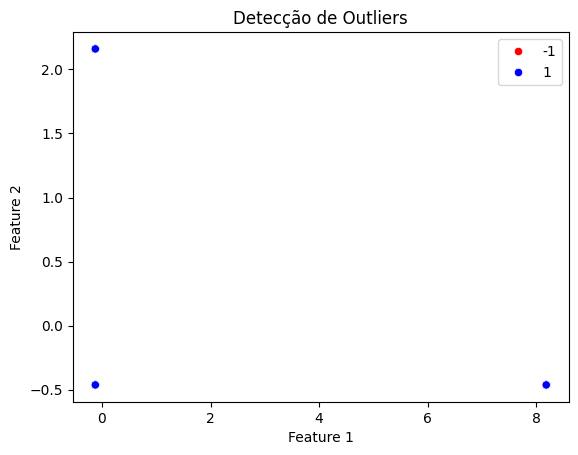

In [ ]:
from sklearn.ensemble import IsolationForest

# Detectar outliers com Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = isolation_forest.fit_predict(X)

# Adicionar outliers ao DataFrame
df_final['Outlier'] = outliers

# Plotar
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=outliers, palette={1: 'blue', -1: 'red'})
plt.title('Detecção de Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


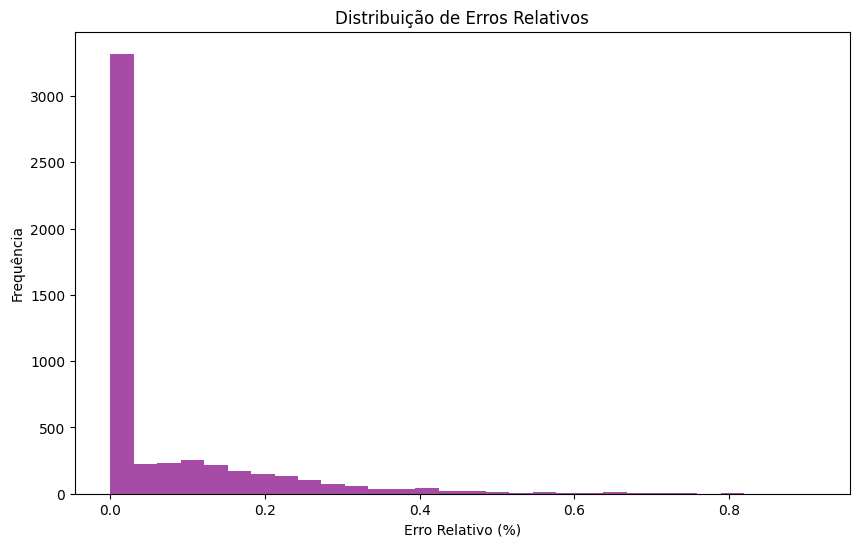

In [ ]:
relative_error = np.abs((y_test - predictions) / y_test)

plt.figure(figsize=(10, 6))
plt.hist(relative_error, bins=30, color='purple', alpha=0.7)
plt.title('Distribuição de Erros Relativos')
plt.xlabel('Erro Relativo (%)')
plt.ylabel('Frequência')
plt.show()
